In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt


In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("arjuntejaswi/plant-village")

# print("Path to dataset files:", path)

In [3]:
Image_size=256
CHANNELS=3
EPOCHS=50
Batch_size=8

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "E:\Githubb\git_repo_ML\Potato_Disease_Detection",
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size

)

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10928\3628376361.py:2: SyntaxWarning: invalid escape sequence '\G'
  "E:\Githubb\git_repo_ML\Potato_Disease_Detection",


Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names

In [6]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

269

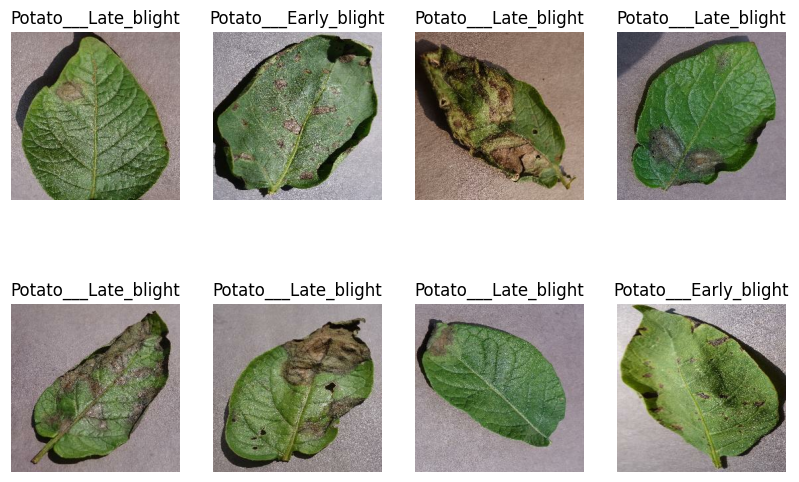

In [9]:
# ...existing code...
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    batch_len = int(image_batch.shape[0])
    num_to_plot = min(batch_len, 12)
    for i in range(num_to_plot):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[int(label_batch[i])])
        plt.axis('off')
# ...existing code...

  # print(image_batch.shape)
  # print(label_batch.numpy())

In [10]:
len(dataset)

269

In [11]:
train_size = 0.8
len(dataset)*train_size

215.20000000000002

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

215

In [14]:
val_size=0.1
len(dataset)*val_size

26.900000000000002

In [15]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

209

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [19]:
len(train_ds)


215

In [20]:
len(val_ds)


26

In [21]:
len(test_ds)

28

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(Image_size, Image_size),
  layers.Rescaling(1./255),
])

In [24]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [25]:
print(dir(tf.keras.layers))

['Activation', 'ActivityRegularization', 'Add', 'AdditiveAttention', 'AlphaDropout', 'Attention', 'AugMix', 'AutoContrast', 'Average', 'AveragePooling1D', 'AveragePooling2D', 'AveragePooling3D', 'AvgPool1D', 'AvgPool2D', 'AvgPool3D', 'BatchNormalization', 'Bidirectional', 'CategoryEncoding', 'CenterCrop', 'Concatenate', 'Conv1D', 'Conv1DTranspose', 'Conv2D', 'Conv2DTranspose', 'Conv3D', 'Conv3DTranspose', 'ConvLSTM1D', 'ConvLSTM2D', 'ConvLSTM3D', 'Convolution1D', 'Convolution1DTranspose', 'Convolution2D', 'Convolution2DTranspose', 'Convolution3D', 'Convolution3DTranspose', 'Cropping1D', 'Cropping2D', 'Cropping3D', 'CutMix', 'Dense', 'DepthwiseConv1D', 'DepthwiseConv2D', 'Discretization', 'Dot', 'Dropout', 'ELU', 'EinsumDense', 'Embedding', 'Equalization', 'Flatten', 'FlaxLayer', 'GRU', 'GRUCell', 'GaussianDropout', 'GaussianNoise', 'GlobalAveragePooling1D', 'GlobalAveragePooling2D', 'GlobalAveragePooling3D', 'GlobalAvgPool1D', 'GlobalAvgPool2D', 'GlobalAvgPool3D', 'GlobalMaxPool1D', 'G

In [26]:
input_shape = (Batch_size,Image_size , Image_size , CHANNELS)
model=models.Sequential([
    resize_and_rescale ,
    data_augmentation ,
    layers.Conv2D(32 , (3,3) , activation="relu" , input_shape=input_shape),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(64 , (3,3) , activation="relu"),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(64 , (3,3) , activation="relu"),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(64 , (3,3) , activation="relu"),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(64 , (3,3) , activation="relu"),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(64 , (3,3) , activation="relu"),
    layers.MaxPooling2D((2,2)) ,

    layers.Flatten() ,
    layers.Dense(64 , activation="relu") ,
    layers.Dense(10 , activation="softmax") ,

])
model.build(input_shape=input_shape)

c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (8, 256, 256, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (8, 256, 256, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (8, 254, 254, 32)      │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (8, 127, 127, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (8, 125, 125, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (8, 62, 62, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (8, 60, 60, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (8, 30, 30, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (8, 28, 28, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (8, 14, 14, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (8, 12, 12, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (8, 6, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (8, 4, 4, 64)          │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (8, 2, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (8, 256)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (8, 64)                │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (8, 10)                │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [29]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
    )

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 83s 362ms/step - accuracy: 0.5849 - loss: 0.8942 - val_accuracy: 0.7644 - val_loss: 0.5995
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 78s 361ms/step - accuracy: 0.8116 - loss: 0.4535 - val_accuracy: 0.8798 - val_loss: 0.2928
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 79s 368ms/step - accuracy: 0.8488 - loss: 0.3911 - val_accuracy: 0.8125 - val_loss: 0.5442
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 80s 371ms/step - accuracy: 0.8814 - loss: 0.2890 - val_accuracy: 0.8750 - val_loss: 0.2824
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 80s 371ms/step - accuracy: 0.8791 - loss: 0.3041 - val_accuracy: 0.8413 - val_loss: 0.4111
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 79s 366ms/step - accuracy: 0.9273 - loss: 0.2047 - val_accuracy: 0.9519 - val_loss: 0.1299
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 91s 425ms/step - accuracy: 0.9076 - loss: 0.2345 - val_accuracy: 0.9038 - val_loss: 0.2398
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 89s 414ms/step - accuracy: 0.9308 - loss: 0

In [31]:
scores=model.evaluate(test_ds)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9866 - loss: 0.0240


In [32]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

ValueError: 'uppper right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

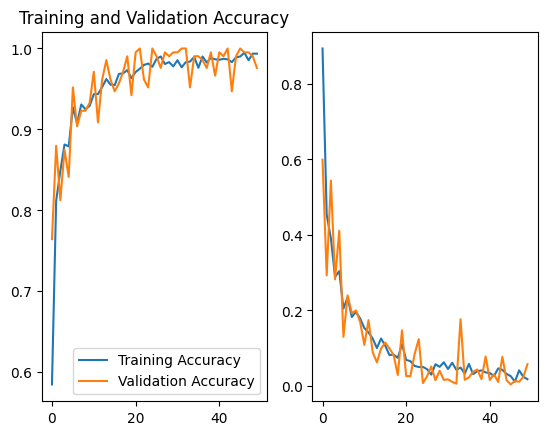

In [36]:
plt.Figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")



plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='uppper right')
plt.title("Training and Validation Loss")



In [1]:
for image_batch , label_batch  in  test_ds.take(1):
    first_image=plt.imshow(image_batch[0].numpy().astype("uint8"))
    first_label=label_batch[0].numpy()

    print("First image to predict")
    plt.show()
    # print("First image actual label" , class_names[first_label.numpy()])

NameError: name 'test_ds' is not defined

In [ ]:
import os
os.makedirs("models", exist_ok=True)


In [50]:
model_version=1
model.save(f"models/{model_version}.keras")